#蓍草卜卦 

大衍之数五十，其用四十有九。分而为二以象两，挂一以象三，揲之以四以象四时，归奇于扐以象闰。五岁再闰，故再扐而后挂。天一，地二；天三，地四；天五，地六；天七，地八；天九，地十。天数五，地数五。五位相得而各有合，天数二十有五，地数三十，凡天地之数五十有五，此所以成变化而行鬼神也。乾之策二百一十有六，坤之策百四十有四，凡三百六十，当期之日。二篇之策，万有一千五百二十，当万物之数也。是故四营而成《易》，十有八变而成卦，八卦而小成。引而伸之，触类而长之，天下之能事毕矣。显道神德行，是故可与酬酢，可与祐神矣。子曰：“知变化之道者，其知神之所为乎。”

大衍之数五十，存一不用，构造天地人三者，历经三变，第一次的余数是5或9，第二次的是4或8，第三次的是4或8，剩下的数量除以4就是结果。即为一爻，算六爻要一个小时。古人构造随机数的方法太费时间啦。用Python写个程序来搞吧！

In [1]:
import random

In [23]:
def sepSkyEarth(data):
    sky =  random.randint(1, data-2)  
    earth = data - sky
    earth -= 1
    return sky , earth


def getRemainder(num):
    rm = num % 4
    if rm == 0:
        rm = 4
    return rm

def getChange(data):
    sky, earth = sepSkyEarth(data)
    skyRemainder = getRemainder(sky)
    earthRemainder = getRemainder(earth)
    change = skyRemainder + earthRemainder + 1
    data = data - change
    return sky, earth, change, data

def getYao(data):
    sky, earth, firstChange, data = getChange(data)
    sky, earth, secondChange, data = getChange(data)
    sky, earth, thirdChange, data = getChange(data)
    yao  = data/4
    return yao, firstChange, secondChange, thirdChange

def sixYao():
    yao1 = getYao(data = 50 - 1)[0]
    yao2 = getYao(data = 50 - 1)[0]
    yao3 = getYao(data = 50 - 1)[0]
    yao4 = getYao(data = 50 - 1)[0]
    yao5 = getYao(data = 50 - 1)[0]
    yao6 = getYao(data = 50 - 1)[0]
    return[yao1, yao2, yao3, yao4, yao5, yao6]

def fixYao(num):
    if num == 6 or num == 9:
        print "there is a changing predict! Also run changePredict()"
    return num % 2
    

def changeYao(num):
    if num == 6:
        num = 1
    elif num == 9:
        num = 2
    num = num % 2
    return(num)

def fixPredict(pred):
    fixprd = [fixYao(i) for i in pred]
    fixprd = list2str(fixprd)
    return fixprd

def list2str(l):
    si = ''
    for i in l:
        si = si +  str(i)
    return si

def changePredict(pred):
    changeprd = [changeYao(i) for i in pred]
    changeprd = list2str(changeprd)
    return changeprd

def getPredict():
    pred = sixYao()
    fixPred = fixPredict(pred)
    if 6 in pred or 9 in pred:
        changePred = changePredict(pred)
    else:
        changePred = None
    return fixPred, changePred  

def interpretPredict(now, future):
    dt = {'111111':'乾','011111':'夬','000000':'坤','010001':'屯','100010':'蒙','010111':'需','111010':'讼','000010':'师',
'010000':'比','110111':'小畜','111011':'履','000111':'泰','111000':'否','111101':'同人','101111':'大有','000100':'谦',
'001000':'豫','011001':'随','100110':'蛊','000011':'临','110000':'观','101001':'噬嗑','100101':'贲','100000':'剥',
'000001':'复','111001':'无妄','100111':'大畜','100001':'颐','011110':'大过','010010':'坎','101101':'离','011100':'咸',
'001110':'恒','111100':'遁','001111':'大壮','101000':'晋','000101':'明夷','110101':'家人','101011':'睽','010100':'蹇',
'001010':'解','100011':'损','110001':'益','111110':'姤','011000':'萃','000110':'升','011010':'困','010110':'井',
'011101':'革','101110':'鼎','001001':'震','100100':'艮','110100':'渐','001011':'归妹','001101':'丰','101100':'旅',
'110110':'巽','011011':'兑','110010':'涣','010011':'节','110011':'中孚','001100':'小过','010101':'既济','101010':'未济'}
    if future:
        name = dt[now] + ' & ' + dt[future]
    else:
        name = dt[now]
    print name
 

def plotTransitionRemainder(N, w):
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    from collections import defaultdict
    
    changes = {}
    for i in range(N):
        sky, earth, firstChange, data = getChange(data = 50 -1)
        sky, earth, secondChange, data = getChange(data)
        sky, earth, thirdChange, data = getChange(data)
        changes[i]=[firstChange, secondChange, thirdChange, data/4]

    ichanges = changes.values()

    firstTransition = defaultdict(int)
    for i in ichanges:
        firstTransition[i[0], i[1]]+=1

    secondTransition = defaultdict(int)
    for i in ichanges:
        secondTransition[i[1], i[2]]+=1

    thirdTransition = defaultdict(int)
    for i in ichanges:
        thirdTransition[i[2], i[3]]+=1    
        
    cmap = cm.get_cmap('Accent_r', len(ichanges))

    for k, v in firstTransition.iteritems(): 
        plt.plot([1, 2], k, linewidth = v*w/N)
    for k, v in secondTransition.iteritems(): 
        plt.plot([2, 3], k, linewidth = v*w/N)
    for k, v in thirdTransition.iteritems(): 
        plt.plot([3, 4], k, linewidth = v*w/N)
    plt.xlabel(u'Time')
    plt.ylabel(u'Changes')


#大衍之数五十，存一不用

In [104]:
data = 50 - 1

###一变

In [105]:
sky, earth, firstChange, data = getChange(data)
print sky, '\n', earth, '\n',firstChange, '\n', data

32 
16 
9 
40


###二变

In [106]:
sky, earth, secondChange, data = getChange(data)
print sky, '\n', earth, '\n',secondChange, '\n', data

15 
24 
8 
32


###三变

In [107]:
sky, earth, thirdChange, data = getChange(data)
print sky, '\n', earth, '\n',thirdChange, '\n', data

10 
21 
4 
28


#得到六爻及变卦

In [234]:
getPredict()

there is a changing predict! Also run changePredict()
there is a changing predict! Also run changePredict()
there is a changing predict! Also run changePredict()


('110101', '000001')

In [233]:
getPredict()

there is a changing predict! Also run changePredict()
there is a changing predict! Also run changePredict()
there is a changing predict! Also run changePredict()


('011110', '110100')

In [251]:
getPredict()

('101100', None)

#得到卦名

In [232]:
fixPred, changePred   = getPredict()
interpretPredict(fixPred, changePred  )

there is a changing predict! Also run changePredict()
屯 & 比


#添加卦辞

In [57]:

#http://baike.fututa.com/zhouyi64gua/

import urllib2
from bs4 import BeautifulSoup
import os

# set work directory
os.chdir('/Users/chengjun/github/iching/')

dt = {'111111':'乾','011111':'夬','000000':'坤','010001':'屯','100010':'蒙','010111':'需','111010':'讼','000010':'师',
    '010000':'比','110111':'小畜','111011':'履','000111':'泰','111000':'否','111101':'同人','10111':'大有','000100':'谦',
    '001000':'豫','011001':'随','100110':'蛊','000011':'临','110000':'观','101001':'噬嗑','100101':'贲','100000':'剥',
    '000001':'复','111001':'无妄','100111':'大畜','100001':'颐','011110':'大过','010010':'坎','101101':'离','011100':'咸',
    '001110':'恒','111100':'遁','001111':'大壮','101000':'晋','000101':'明夷','110101':'家人','101011':'睽','010100':'蹇',
    '001010':'解','100011':'损','110001':'益','111110':'姤','011000':'萃','000110':'升','011010':'困','010110':'井',
    '011101':'革','101110':'鼎','001001':'震','100100':'艮','110100':'渐','001011':'归妹','001101':'丰','101100':'旅',
    '110110':'巽','011011':'兑','110010':'涣','010011':'节','110011':'中孚','001100':'小过','010101':'既济','101010':'未济'}


dr = {}
for i, j in dt.iteritems():
    dr[unicode(j, 'utf8')]= i

In [60]:
url = "http://baike.fututa.com/zhouyi64gua/"
content = urllib2.urlopen(url).read() #获取网页的html文本
soup = BeautifulSoup(content) 
articles = soup.find_all('div', {'class', 'gualist'})[0].find_all('a')
links = [i['href'] for i in articles]

In [61]:
links[:2]

[u'http://baike.fututa.com/a5738', u'http://baike.fututa.com/a5739']

In [64]:
dtext = {}

from time import sleep

num = 0
for j in links:
    sleep(0.1)
    num += 1
    ghtml = urllib2.urlopen(j).read() #获取网页的html文本
    print j, num
    gua = BeautifulSoup(ghtml, from_encoding = 'gb18030') 
    guaName =  gua.title.text.split('_')[1].split(u'卦')[0]
    guaId = dr[guaName]
    guawen = gua.find_all('div', {'class', 'gua_wen'})
    guaText = []
    for i in guawen:
        guaText.append(i.get_text() + '\n\n')
    guaText = ''.join(guaText)
    dtext[guaId] = guaText

http://baike.fututa.com/a5738 1
http://baike.fututa.com/a5739 2
http://baike.fututa.com/a5740 3
http://baike.fututa.com/a5741 4
http://baike.fututa.com/a5742 5
http://baike.fututa.com/a5743 6
http://baike.fututa.com/a5744 7
http://baike.fututa.com/a5745 8
http://baike.fututa.com/a5746 9
http://baike.fututa.com/a5747 10
http://baike.fututa.com/a5748 11
http://baike.fututa.com/a5749 12
http://baike.fututa.com/a5750 13
http://baike.fututa.com/a5751 14
http://baike.fututa.com/a5752 15
http://baike.fututa.com/a5753 16
http://baike.fututa.com/a5754 17
http://baike.fututa.com/a5755 18
http://baike.fututa.com/a5756 19
http://baike.fututa.com/a5757 20
http://baike.fututa.com/a5758 21
http://baike.fututa.com/a5759 22
http://baike.fututa.com/a5760 23
http://baike.fututa.com/a5761 24
http://baike.fututa.com/a5762 25
http://baike.fututa.com/a5763 26
http://baike.fututa.com/a5764 27
http://baike.fututa.com/a5765 28
http://baike.fututa.com/a5766 29
http://baike.fututa.com/a5767 30
http://baike.fututa

In [67]:
dtextu = {}
for i, j in dtext.iteritems():
    dtextu[i]= j.encode('utf-8')

In [75]:
dtext.values()[0]

u'\u89c2\u5366\u539f\u6587\u89c2\u3002\u76e5\u800c\u4e0d\u8350\uff0c\u6709\u5b5a\u9852\u82e5\u3002\u8c61\u66f0\uff1a\u98ce\u884c\u5730\u4e0a\uff0c\u89c2\u3002\u5148\u738b\u4ee5\u7701\u65b9\uff0c\u89c2\u6c11\u8bbe\u6559\u3002\u767d\u8bdd\u6587\u89e3\u91ca\u89c2\u5366\uff1a\u796d\u7940\u65f6\u704c\u9152\u964d\u795e\u800c\u4e0d\u732e\u4eba\u7272\uff0c\u56e0\u4e3a\u7528\u4f5c\u796d\u7940\u7684\u4fd8\u864f\u7684\u5934\u90e8\u80bf\u4e86\uff0c\u4e0d\u80fd\u7528\u4f5c\u796d\u54c1\u3002\u300a\u8c61\u8f9e\u300b\u8bf4\uff1a\u672c\u5366\u4e0a\u5366\u4e3a\u5dfd\u4e3a\u98ce\uff0c\u4e0b\u5366\u4e3a\u5764\u4e3a\u5730\uff0c\u98ce\u884c\u5927\u5730\u5439\u62c2\u4e07\u7269\uff0c\u8fd9\u662f\u89c2\u7684\u5366\u8c61\u3002\u5148\u738b\u89c2\u6b64\u5366\u8c61\u53d6\u6cd5\u4e8e\u5468\u6d41\u516b\u65b9\u7684\u98ce\uff0c\u4ece\u800c\u5de1\u89c6\u90a6\u56fd\uff0c\u89c2\u5bdf\u6c11\u60c5\uff0c\u63a8\u884c\u6559\u5316\u3002\n\n\u300a\u65ad\u6613\u5929\u673a\u300b\u89e3\u89c2\u5366\u5dfd\u4e0a\u5764\u4e0b\uff0c\u4e

In [93]:
import json
with open("/Users/chengjun/github/iching/package_data.dat",'w') as outfile:
    json.dump(dtextu, outfile, ensure_ascii=False) #, encoding = 'utf-8')

In [90]:
dat = json.load(open('package_data.dat'), encoding='utf-8')

In [92]:
print dat.values()[1]

观卦原文观。盥而不荐，有孚顒若。象曰：风行地上，观。先王以省方，观民设教。白话文解释观卦：祭祀时灌酒降神而不献人牲，因为用作祭祀的俘虏的头部肿了，不能用作祭品。《象辞》说：本卦上卦为巽为风，下卦为坤为地，风行大地吹拂万物，这是观的卦象。先王观此卦象取法于周流八方的风，从而巡视邦国，观察民情，推行教化。

《断易天机》解观卦巽上坤下，为乾宫四世卦。观卦象征将道义展示于众人面前。观卦风在上而地在下，是春风浩荡、万物滋生之象。

北宋易学家邵雍解以下观上，周游观览；平心静气，坚守岗位。得此卦者，处身于变化之中，心神不宁，宜多观察入微，待机行事，切勿妄进。

台湾国学大儒傅佩荣解时运：出外游览，不易闲居。财运：贩卖洋货，须防风险。家宅：供养神佛。身体：风湿之症，运动调养。

传统解卦这个卦是异卦（下坤上巽）相叠，风行地上，喻德教遍施。观卦与临卦互为综卦，交相使用。在上者以道义观天下；在下者以敬仰瞻上，人心顺服归从。大象：风运行于坤地之上，喻有周游观览之意。阴长阳消，正道衰微，万物难行。运势：处身于变化之中，宜多观察入微，心身苦恼，并防外来诱惑。事业：事业已出现不顺利的迹象，务必谦虚慎重，高瞻远瞩，尤忌短期行为，心胸开阔，注意搞好人际关系，团结他人，不宜轻率行动。必要时不妨投靠德行高的人，以图再度发展。经商：市场形势不稳定，正处于变动，应谨慎小心，随时观察动向，从长计议，做好退却的准备。求名：贵在自知之明，虚心向他人求教，端正处世态度，尤其不可自我满足，更须守中持正，树立远大理想，勿丧失个人追求的目标，勿偏离正道。婚恋：不顺利，双方应经受住考验，从长计议，会有理想的结果。决策：具有组织能力，适宜担任负责工作，但人生旅途多曲折，必须注意培养自己的预见性和观察力，办事务必公正，实事求是，注意人心动向，关心他人。尤其不可以陷入小人之道和近视行为之中。应有决断精神，不可盲从，必要时可进行策略依附。

台湾张铭仁解卦观：表示观察、观看，是个最标准的状况卦，吉凶未定。凡事不可轻下决定，需要再观察一下局势再做打算。尤其是对长官、上位者的态度更是要察言观色，不可轻忽大意。解释：尚在观察中。特性：有创意，喜欢开发新事物，见解新颖，爱旅行，观摩他人，研究比较，不断修正反省自己。运势：处在有危险不稳的时运，耍多观望时势之利弊，待机行事，于人事物，须以诚待之，才能感化而幸免陷入困难也。家运：正处于下

In [35]:
now, future = getPredict()

there is a changing predict! Also run changePredict()


In [38]:
def ichingText(k):
    import json
    dat = json.load(open('iching/package_data.dat'))
    print dat[k]

In [40]:
ichingText(future)

既济卦原文既济。亨，小利贞，初吉终乱。象曰：水在火上，既济。君子以思患而预防之。白话文解释既济卦：亨通。这是小见吉利的贞卜。起初吉利，最后将发生变故。《象辞》说：本卦上卦为坎，坎为水；下卦为离，离为火。水上火下，水浇火熄，是既济之卦的卦象。君子观此卦象，从而有备于无患之时，防范于未然之际。

《断易天机》解既济卦坎上离下，为坎宫三世卦。既济就是说已经成功，事情已经摆平。但还需谨慎，当心物极必反。

北宋易学家邵雍解济助有成，坚忍自重；由大而小，确保盛运。得此卦者，事业有成，成功之象，但谨防盛极必衰，宜退守为吉，再进则凶。

台湾国学大儒傅佩荣解时运：盛极必衰，谨防后患。财运：及时出手，可得利润。家宅：大厦可居；百年好合。身体：大病初愈，仍需自理。

传统解卦这个卦是异卦（下离上坎）相叠。坎为水，离为火，水火相交，水在火上，水势压倒火势，救火大功告成。既，已经；济，成也。既济就是事情已经成功，但终将发生变故。大象：坎水在离火之上，水性下注，火势上炎，水火相济，完成之意。运势：名利双收，成功之象，但须防物极必反，初吉后凶。事业：处在顺利和兴旺的阶段，甚至大功已经告成。如何才能保住这种势头，是问题的关键。必须认识盛极将衰的真理，思患预防，防微杜渐，有备可无患。同时，一定要密切注意形势，抓住有利时机，继续奋发向上，推动事业发展。经商：由于市场形势有利，已经赚得许多，但同时也预示着危机的随时出现。因此，务必小心在意，事未到，先预防，终日提防戒惧。同时，认真观察市场的变化，随时转向，开拓新市场。求名：个人追求名利的基本条件已经具备。必须防止因此而变得僵化和保守，以致功亏一篑，半途而废。婚恋：起初顺利，中途会出现挫折。决策：各方面条件都很好，环境又有利于成长。但因此反而会使自己满足，停止前进，甚至变得颓废，趋向没落。一定要不断刻苦努力，保持谦虚美德，常怀不安之心，防止不测事件发生。

台湾张铭仁解卦既济：表示水火阴阳调和，一时平安和乐之象。水火本相克，因一时环境或人事所影响，而暂时相安无事，但终非常久之象，必有所冲克而败。解释：已经得到利益，不可贪得无厌。特性：物质丰盛，但精神易空虚，外华内虚，交际广，知心少，心思细腻，多愁善感，喜宁静的生活。运势：功名双收。极盛之时，但须知物极必反，宜退守为吉，再进则凶。但得此卦者，皆有因一时顺利而忘本，大意失荆州，终有人不和、心迷乱之象。家运

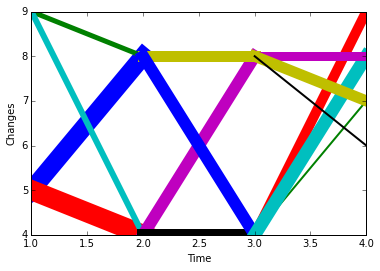

In [29]:
%matplotlib inline
plotTransitionRemainder(10000, w = 50)

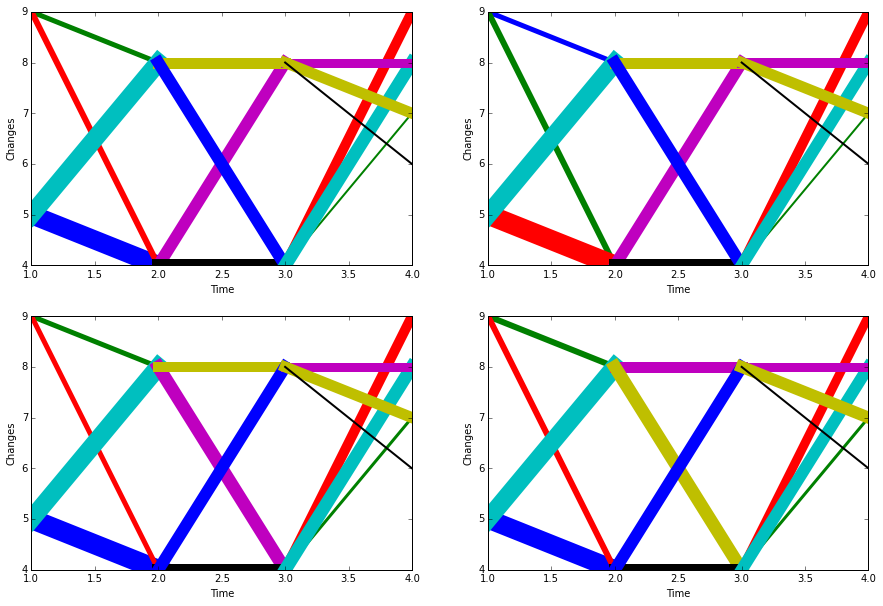

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10),facecolor='white')
plt.subplot(2, 2, 1)
plotTransitionRemainder(1000, w = 50)
plt.subplot(2, 2, 2)
plotTransitionRemainder(1000, w = 50)
plt.subplot(2, 2, 3)
plotTransitionRemainder(1000, w = 50)
plt.subplot(2, 2, 4)
plotTransitionRemainder(1000, w = 50)

In [48]:
dt = {'111111':u'乾','011111':u'夬','000000':u'坤','010001':u'屯','100010':u'蒙','010111':u'需','111010':u'讼','000010':'师',
'010000':u'比','110111':u'小畜','111011':u'履','000111':u'泰','111000':u'否','111101':u'同人','101111':u'大有','000100':u'谦',
'001000':u'豫','011001':u'随','100110':u'蛊','000011':u'临','110000':u'观','101001':u'噬嗑','100101':u'贲','100000':'u剥',
'000001':u'复','111001':u'无妄','100111':u'大畜','100001':u'颐','011110':u'大过','010010':u'坎','101101':u'离','011100':u'咸',
'001110':u'恒','111100':u'遁','001111':u'大壮','101000':u'晋','000101':u'明夷','110101':u'家人','101011':u'睽','010100':u'蹇',
'001010':u'解','100011':u'损','110001':u'益','111110':u'姤','011000':u'萃','000110':u'升','011010':u'困','010110':u'井',
'011101':u'革','101110':u'鼎','001001':u'震','100100':u'艮','110100':u'渐','001011':u'归妹','001101':u'丰','101100':u'旅',
'110110':u'巽','011011':u'兑','110010':u'涣','010011':u'节','110011':u'中孚','001100':u'小过','010101':u'既济','101010':u'未济'
      }

In [50]:
for i in dt.values():
    print i

观
益
家人
渐
蹇
既济
小过
丰
大过
夬
震
豫
兑
困
升
泰
临
师
艮
贲
遁
同人
蒙
损
鼎
大有
无妄
否
睽
未济
中孚
涣
坎
节
需
井
巽
小畜
萃
随
大壮
恒
革
咸
解
归妹
离
坤
复
大畜
蛊
明夷
谦
乾
姤
颐
u剥
屯
比
旅
讼
履
晋
噬嗑


In [39]:
dtu = {}
for i, j in dt.iteritems():
    dtu[i] = unicode(j, 'utf-8')
    

In [44]:
def ichingDate(d):
    import random
    random.seed(d)
    try:
        print 'Your birthday & your prediction time:', str(d)
    except:
        print('Your birthday & your prediction time:', str(d))
    

{'110000': u'\u89c2', '110001': u'\u76ca', '110101': u'\u5bb6\u4eba', '110100': u'\u6e10', '010100': u'\u8e47', '010101': u'\u65e2\u6d4e', '001100': u'\u5c0f\u8fc7', '001101': u'\u4e30', '011110': u'\u5927\u8fc7', '011111': u'\u592c', '001001': u'\u9707', '001000': u'\u8c6b', '011011': u'\u5151', '011010': u'\u56f0', '000110': u'\u5347', '000111': u'\u6cf0', '000011': u'\u4e34', '000010': u'\u5e08', '100100': u'\u826e', '100101': u'\u8d32', '111100': u'\u9041', '111101': u'\u540c\u4eba', '100010': u'\u8499', '100011': u'\u635f', '101110': u'\u9f0e', '101111': u'\u5927\u6709', '111001': u'\u65e0\u5984', '111000': u'\u5426', '101011': u'\u777d', '101010': u'\u672a\u6d4e', '110011': u'\u4e2d\u5b5a', '110010': u'\u6da3', '010010': u'\u574e', '010011': u'\u8282', '010111': u'\u9700', '010110': u'\u4e95', '110110': u'\u5dfd', '110111': u'\u5c0f\u755c', '011000': u'\u8403', '011001': u'\u968f', '001111': u'\u5927\u58ee', '001110': u'\u6052', '011101': u'\u9769', '011100': u'\u54b8', '001010':